In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import RobustScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, average_precision_score, auc, precision_recall_curve, log_loss, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
from sklearn.feature_selection import SelectKBest

In [178]:
seed = 123

In [179]:
# read file and load into a dataframe
df1 = pd.read_csv('data.csv')
df1

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [180]:
df1.diagnosis.replace("B", 0, inplace = True)
df1.diagnosis.replace("M", 1, inplace = True)

In [181]:
x_diagnosis = df1['diagnosis'].value_counts()
print(x_diagnosis)

0    357
1    212
Name: diagnosis, dtype: int64


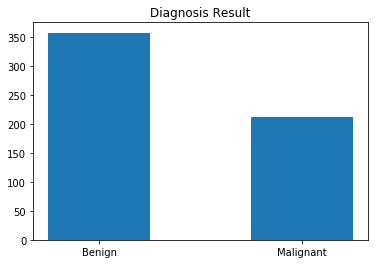

In [182]:
plt.bar(x=['Benign', 'Malignant'], height = x_diagnosis, width = 0.5)
plt.title('Diagnosis Result')
plt.show()

In [183]:
df1.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [184]:
total = df1.isnull().sum().sort_values(ascending = False)
pd.concat([total], axis=1, keys=['Total']).transpose()

,fractal_dimension_worst,area_se,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
dfcorr = df1.corr(method = 'pearson')

In [186]:
dfcorr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [187]:
df1['diagnosis'] = df1['diagnosis'].astype('str')

In [188]:
df1.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

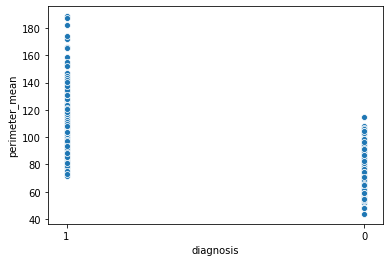

In [189]:
sns.scatterplot('diagnosis', 'perimeter_mean', data = df1)

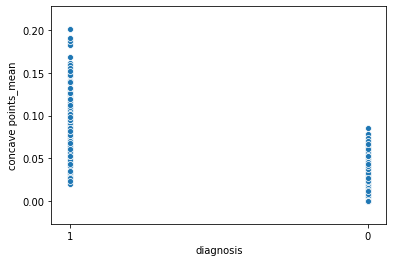

In [190]:
sns.scatterplot('diagnosis', 'concave points_mean', data = df1)

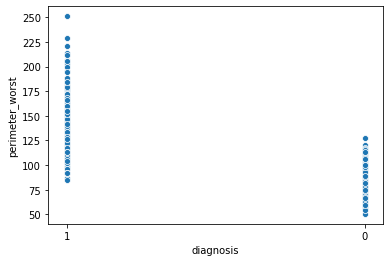

In [191]:
sns.scatterplot('diagnosis', 'perimeter_worst', data = df1)

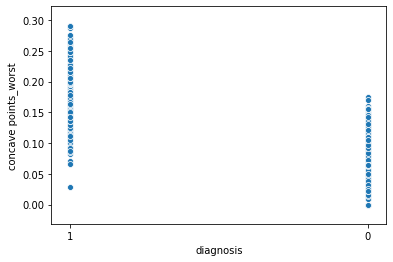

In [192]:
sns.scatterplot('diagnosis', 'concave points_worst', data = df1)

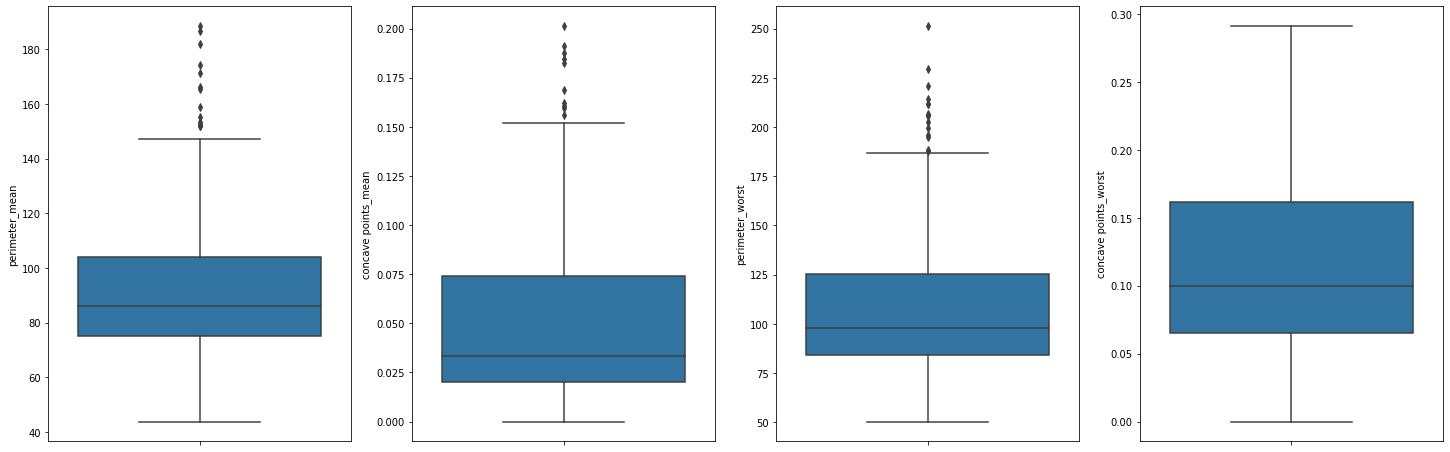

In [193]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(25,8))
s = sns.boxplot(ax = ax1, y="perimeter_mean",data=df1)
s = sns.boxplot(ax = ax2, y="concave points_mean",data=df1)
s = sns.boxplot(ax = ax3, y="perimeter_worst",data=df1)
s = sns.boxplot(ax = ax4, y="concave points_worst",data=df1)
plt.show()

#fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,8))
#s = sns.boxplot(ax = ax1, y="V11",data=X_train)
#s = sns.boxplot(ax = ax2, y="V4",data=X_train)
#s = sns.boxplot(ax = ax3, y="V2",data=X_train)
#s = sns.boxplot(ax = ax4, y="V21",data=X_train)
#plt.show()

In [194]:
drop_list = ['radius_mean', 'area_mean', 'radius_worst', 'area_worst']

In [195]:
df1 = df1.drop(drop_list, axis=1)  # get only independent variables

In [196]:
# Train Test Split
X = df1.drop('diagnosis', axis=1)  # get only independent variables
y = df1['diagnosis']  # get Class variable

#y = df1.loc[:, ['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=seed)


In [197]:
temp_df = pd.concat([X_train, y_train], axis=1, sort=False)  # concatenate both X and y to remove outliers
#temp_df1= temp_df[temp_df.Class == 1]   # fraud class
#temp_df0= temp_df[temp_df.Class == 0]   # non fraud class

In [198]:
# prior to removing outlier
temp_df.shape

(426, 27)

In [199]:
temp_df

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
366,26.83,133.70,0.09905,0.16690,0.16410,0.126500,0.1875,0.06020,0.9761,1.8920,...,0.004286,33.81,160.00,0.1278,0.3416,0.37030,0.21520,0.3271,0.07632,1
86,21.46,94.25,0.09444,0.09947,0.12040,0.049380,0.2075,0.05636,0.4204,2.2200,...,0.003249,29.25,108.40,0.1306,0.1976,0.33490,0.12250,0.3020,0.06846,1
230,19.08,113.40,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,0.2959,0.6790,...,0.002336,24.89,133.50,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061,1
467,18.10,61.06,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,...,0.002979,24.62,71.11,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875,0
138,17.57,96.85,0.11670,0.13050,0.15390,0.086240,0.1957,0.06216,1.2960,1.4520,...,0.002887,21.43,121.40,0.1411,0.2164,0.33550,0.16670,0.3414,0.07147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,19.22,107.10,0.12430,0.23640,0.29140,0.124200,0.2375,0.07603,0.5204,1.3240,...,0.007330,24.17,119.40,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500,1
326,12.88,90.03,0.09309,0.05306,0.01765,0.027330,0.1373,0.05700,0.2571,1.0810,...,0.002476,18.00,98.40,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083,0
139,13.39,73.00,0.11640,0.11360,0.04635,0.047960,0.1771,0.06072,0.3384,1.3430,...,0.003442,15.77,76.53,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,0
474,15.62,70.41,0.10070,0.10690,0.05115,0.015710,0.1861,0.06837,0.1482,0.5380,...,0.004672,19.35,80.78,0.1332,0.3898,0.33650,0.07966,0.2581,0.10800,0


In [200]:
temp_df1= temp_df[temp_df.diagnosis == '1']   # cancer
temp_df0= temp_df[temp_df.diagnosis == '0']   # no cancer

In [201]:
temp_df1.shape

(159, 27)

In [202]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_perimeter_mean = stats.zscore(temp_df1.perimeter_mean) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_perimeter_mean) < 3)] # drop rows with zscore > 3 or < -3

zscore_concave_points_mean = stats.zscore(temp_df1['concave points_mean']) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_concave_points_mean) < 3)] # drop rows with zscore > 3 or < -3

zscore_perimeter_worst  = stats.zscore(temp_df1.perimeter_worst ) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_perimeter_worst ) < 3)] # drop rows with zscore > 3 or < -3

zscore_perimeter_mean = stats.zscore(temp_df0.perimeter_mean) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_perimeter_mean) < 3)] # drop rows with zscore > 3 or < -3

zscore_concave_points_mean = stats.zscore(temp_df0['concave points_mean']) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_concave_points_mean) < 3)] # drop rows with zscore > 3 or < -3

zscore_perimeter_worst  = stats.zscore(temp_df0.perimeter_worst ) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_perimeter_worst ) < 3)] # drop rows with zscore > 3 or < -3


In [203]:
temp_df = pd.concat([temp_df1, temp_df0], axis=0, sort=False)  # concatenate both Classes

In [204]:
temp_df.shape

(417, 27)

In [205]:
# get X_train and y_train data after removing outlier
X_train = temp_df.drop('diagnosis', axis=1)  # get only independent variables
#y_train = temp_df.loc[:,['diagnosis']]  # get Class variable
y_train = temp_df['diagnosis']
y_train.astype('category')

366    1
86     1
230    1
138    1
164    1
      ..
483    0
290    0
326    0
139    0
474    0
Name: diagnosis, Length: 417, dtype: category
Categories (2, object): [0, 1]

In [206]:
#rf_pipeline = Pipeline('rf', RandomForestClassifier(random_state=seed, n_jobs=-1))

rf_pipeline = Pipeline([('rf', RandomForestClassifier(random_state=seed, n_jobs=-1))])
        

params = {'rf__n_estimators': [50, 75, 100],
          'rf__max_depth': [4, 6, 8],
          'rf__max_features': ['sqrt', 'log2'],
          'rf__class_weight': ['balanced', None]}
rf_grid = GridSearchCV(rf_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(accuracy_score),
                                'll': make_scorer(log_loss, greater_is_better=False)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [207]:
rf_grid.fit(X_train, y_train)

/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                       

In [208]:
rf_grid.best_score_, rf_grid.best_params_

(0.9640287769784173,
 {'rf__class_weight': 'balanced',
  'rf__max_depth': 6,
  'rf__max_features': 'sqrt',
  'rf__n_estimators': 100})

In [209]:
#from sklearn.calibration import CalibratedClassifierCV, calibration_curve

#predictions = rf_grid.predict_proba(X_train)[:, 1]
#binned_true_p, binned_predict_p = calibration_curve(y_train, predictions, n_bins=10)

In [210]:
#plt.scatter(binned_true_p, binned_predict_p)
#m, b = np.polyfit(binned_true_p, binned_predict_p, 1)
#plt.plot(binned_true_p, m*binned_true_p + b)
#plt.show()

In [211]:
#calibrated_rf_grid = CalibratedClassifierCV(rf_grid, cv=5, method='isotonic')
#calibrated_rf_grid.fit(X_train, y_train);

In [212]:
#y_pred = calibrated_rf_grid.predict_proba(X_test)

In [213]:
lr_pipeline = Pipeline([('select_best', SelectKBest()),
                        ('logistic', LogisticRegression(class_weight='balanced', random_state=seed))])

In [214]:
params = {'logistic__C': [0.1, 1.0, 10.0],
          'select_best__k': [3,5,7,9,'all']}
lr_grid = GridSearchCV(lr_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(accuracy_score),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [215]:
lr_grid.fit(X_train, y_train)

/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/saurabhbiswas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('select_best',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x1a18598b90>)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='warn',
                             

In [216]:
lr_grid.best_score_, lr_grid.best_params_

(0.9616306954436451, {'logistic__C': 10.0, 'select_best__k': 'all'})

In [217]:
y_pred = rf_grid.predict(X_test)

In [218]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.958041958041958

In [219]:
f1 = f1_score(y_test, y_pred, pos_label='1')
f1

0.9444444444444444

In [220]:
confusion_matrix(y_test, y_pred)

array([[86,  4],
       [ 2, 51]])

In [221]:
y_pred = lr_grid.predict(X_test)

In [222]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9300699300699301

In [223]:
confusion_matrix(y_test, y_pred)

array([[84,  6],
       [ 4, 49]])

In [224]:
f1 = f1_score(y_test, y_pred, pos_label='1')
f1

0.9074074074074073